In [1]:
import datajoint as dj

In [2]:
schema = dj.schema('dimitri_university')

Connecting dimitri@localhost:3306


In [3]:
schema.drop()

Proceed to delete entire schema `dimitri_university`? [yes, No]: no


In [4]:
schema.spawn_missing_classes()

In [5]:
@schema
class Student(dj.Manual):
    definition = """
    student_id : int unsigned   # university-wide ID number
    ---
    first_name      : varchar(40)
    last_name       : varchar(40)
    sex             : enum('F', 'M', 'U')
    date_of_birth   : date
    home_address    : varchar(120) # mailing street address
    home_city       : varchar(60)  # mailing address
    home_state      : char(2)      # US state acronym: e.g. OH
    home_zip        : char(10)     # zipcode e.g. 93979-4979
    home_phone      : varchar(20)  # e.g. 414.657.6883x0881
    """
    
@schema
class Department(dj.Manual):
    definition = """
    dept : varchar(6)   # abbreviated department name, e.g. BIOL
    ---
    dept_name    : varchar(200)  # full department name
    dept_address : varchar(200)  # mailing address
    dept_phone   : varchar(20)
    """

@schema
class StudentMajor(dj.Manual):
    definition = """
    -> Student
    ---
    -> Department
    declare_date :  date  # when student declared her major
    """

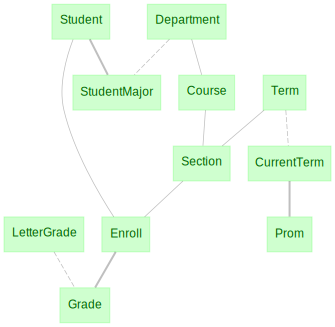

In [6]:
dj.Diagram(schema)

In [ ]:
@schema
class Course(dj.Manual):
    definition = """
    -> Department
    course  : int unsigned   # course number, e.g. 1010
    ---
    course_name :  varchar(200)  # e.g. "Neurobiology of Sensation and Movement."
    credits     :  decimal(3,1)  # number of credits earned by completing the course
    """
    
@schema
class Term(dj.Manual):
    definition = """
    term_year : year
    term      : enum('Spring', 'Summer', 'Fall')
    """

@schema
class Section(dj.Manual):
    definition = """
    -> Course
    -> Term
    section : char(1)
    ---
    auditorium   :  varchar(12)
    """
    
@schema
class CurrentTerm(dj.Manual):
    definition = """
    ---
    -> Term
    """

@schema
class Enroll(dj.Manual):
    definition = """
    -> Student
    -> Section
    """

@schema
class LetterGrade(dj.Manual):
    definition = """
    grade : char(2)
    ---
    points : decimal(3,2)
    """

@schema
class Grade(dj.Manual):
    definition = """
    -> Enroll
    ---
    -> LetterGrade
    """

In [ ]:
CurrentTerm()

In [ ]:
dj.Diagram(schema)

In [ ]:
CurrentTerm.describe()

In [ ]:
@schema
class Prom(dj.Manual):
    definition = """
    -> CurrentTerm
    ---    
    """

In [ ]:
isinstance(IndexError(), IndexError)

In [ ]:
try:
    raise IndexError()
except Exception as e:
    print(isinstance(e, IndexError))

In [ ]:
Prom()

In [ ]:
Term().insert1(('2020', 'Spring'))

In [ ]:
CurrentTerm.insert1((' ', '2019', 'Fall'))

In [ ]:
CurrentTerm()

In [ ]:
Prom.describe();

In [ ]:
set((1,2,3)).difference(({'_'}))

In [ ]:
{'1213'}